# Análise do vestibular ENEM 2019

## Introduction to Data Science

## The CRISP-DM approach to Data Science Tasks

_________________________

## I. Business Understanding
                    
#### The Business Understanding phase focuses on understanding the objectives and requirements of the project.  
+ Determine business objectives:   
+ Assess situation:  
+ Determine data mining goals:  
+ Produce project plan:  



#### Determine business objectives:   

* Compreender quais aspectos melhor determinam a nota de um aluno no Enem de acordo com a Teoria de Resposta ao Item.

- Observar se existe uma correlação entre as notas de cada uma das 4 áreas do conhecimento e a redação. 

* Entender como é distribuida a educação no país, e quais fatores interferem no desempenho de um estudante.

- Analisar se com as cotas há um acesso mais democrático às instituições públicas de ensino.

#### Assess situation:  

* Sabemos que o ENEM utiliza o TRI (Teoria de Resposta ao Item) que classifica as questões conforme a dificuldade, isto é, cada questão possui um peso pré-determinado que não conhecido do público. Esse sistema é utilizado para evitar "chutes", se um aluno erra uma questão considerada fácil e acerta uma questão considerada difícil, o aluno sofre uma penalidade. Desse modo, mesmo com o gabarito dos alunos não nos é possível determinar a nota correta dos alunos, pretendemos obter o melhor modelo de regrassão para atribuir a nota aos alunos.

- A priori, acreditamos que no Brasil, as escolas privadas e escolas públicas federais obtém um melhor desempenho no ENEM, do que os alunos de escolas públicas estaduais e municipais. Além disso, acreditamos que a locaclização geográfica da escola e da moradia do estudante e a renda familiar influencia no seu desempenho, alunos que moram em situações vuneráveis e|ou possuem baixa renda tendem a obter um desempenho inferior a média nacional. 

#### Determine data mining goals:  

- Obter os dados oficiais do INEP de todos os alunos que fizeram o vestibular no ano de 2019: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem onde consta os microdados do ENEM ("Os microdados do Enem são o menor nível de desagregação de dados recolhidos por meio do exame. Eles atendem a demanda por informações específicas ao disponibilizar as provas, os gabaritos, as informações sobre os itens, as notas e o questionário respondido pelos inscritos no Enem" - INEP).

* Obter as notas de corte de algumas universidades públicas brasileiras para analizar a democratização do ensino público.

#### Produce project plan: 

- Limpar os dados, por exemplo, remover os alunos treineiros e alunos que não concluiram o vestibular da base de dados.

* Analisar os nossos dados, obter as médias, os mínimos e os máximos.

- Criar classificadores, se necessário. 

* Determinar as informações que serão utilizadas em cada modelo.

- Observar se existe alguma correlação dentre as informações disponíveis. 

* Encontrar o melhor modelo de regressão para as notas.

- Analisar a questão das cotas e da nota de corte das universidades públicas.

* Reunir as informações obtidas e concluir o trabalho.


## II. Data Understanding  

+ Collect initial data:  
+ Describe data:  
+ Explore data:  
+ Verify data quality:  

Os dados oficiais do vestibular foram obtidos através de https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem nele vamos utilizar o arquivo MICRODADDOS_ENEM_2019.csv com os dados brutos de todos os alunos que realizaram o ENEM. Já o arquivo Dicionário_Microdados_Enem_2019.xlsx descreve esses dados.

In [2]:
# Importando Bibliotecas 


import numpy as np
import pandas as pd
import seaborn as sns
import dask
import json
import dask.dataframe as dd
import matplotlib.pyplot as plt
import regex as re

# Importando os Dados

dic = pd.read_excel('Dicionário_Microdados_Enem_2019.xlsx' )

#df = pd.read_csv("MICRODADOS_ENEM_2019.csv",sep=";",encoding = "ISO-8859-1",decimal=",")
#df.head()

df = dd.read_csv("MICRODADOS_ENEM_2019.csv",sep=";",encoding = "ISO-8859-1",dtype={'NU_IDADE': 'float64'})
# df = dd.read_csv("MICRODADOS_ENEM_2019.csv",sep=";",encoding = "ISO-8859-1",dtype={'NU_IDADE': 'float64', 
#                                                                                    'CO_MUNICIPIO_NASCIMENTO':'float64', 
#                                                                                    'CO_UF_NASCIMENTO':'float64', 
#                                                                                    'NO_MUNICIPIO_ESC':'object', 
#                                                                                    'SG_UF_ESC':'object'})

df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B


### Observações gerais:

* Há 3 tipos de vestibulandos que realizaram o ENEM, os estudantes que ainda não terminaram o Ensino Médio, os alunos que concluíram o Ensino Médio no ano de 2019, e os alunos que concluíram o ENEM anteriormente.
    - Segundo as informações do INEP, as notas dos alunos em cada uma das provas segue uma distribuição normal com média 500 e desvião padrão 100 dos alunos que terminaram o vestibular no ano de 2019.
* As primeiras colunas referem-se aos dados pessoais do vestibulando:
    - Município de Residência;
    - Idade;
    - Sexo (M para masculino e F para feminino);
    - Estado Civil;
    - Raça; 
    - Nacionadlidade e cidade de nascença. 
* Em seguida há colunas referentes a escolaridade básica:
    - Se concluiu ou não o Ensino Médio;
    - Se sim em qual escola;
    - O ano que ele concluiu;
    - Informações da localização da escola;
    - Informações do tipo de escola.
* As próximas colunas se referem a necessidade de um atendimento especial por causa de alguma deficiência.
    - Não iremos entrar muito em detalhes, pois nesse trabalho vamos focar nos estudantes que não possuem problemas físicos, já que não há garantias que o Inep ofereça os auxílios adequados para essas pessoas terem as mesmas oportunidades.
* Depois, seguem as colunas com informações do local de aplicação do vestibular.
* Nas colunas posteriores os dados são relacionados à prova:
    - A presença dos alunos em cada umas das provas;
    - As repostas dos candidatos as questões objetivas;
    - Notas de cada uma das avaliações;
    - Gabarito oficial da prova que o aluno concluiu;
    - Nota da Redação e de cada uma das 5 competências.
* Por fim temos o questionário socioeconômico:
    - Perguntas aos candidatos sobre a sua família;
    - Perguntas sobre a renda familiar;
    - Perguntas sobre a moradia.

In [17]:
df.describe(include='all')


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,object,float64,object,float64,object,float64,float64,float64,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,float64,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [18]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: object(41), float64(25), int64(70)

Analizando os dados faltates do dataframe:

In [19]:
nans = df.isnull().sum()

i = 0

for j in nans:
    print(df.columns[i],j)
    i = i+1

Observamos que as notas faltantes correnspondem aos alunos que faltaram no dia do vestibular ou tiveram sua prova anulada:

In [ ]:
present = [
    df.groupby('TP_PRESENCA_CN').NU_NOTA_CN.sum().compute(),
    df.groupby('TP_PRESENCA_CH').NU_NOTA_CH.sum().compute(),
    df.groupby('TP_PRESENCA_LC').NU_NOTA_LC.sum().compute(),
    df.groupby('TP_PRESENCA_MT').NU_NOTA_MT.sum().compute()]
    
print(present)

[TP_PRESENCA_CN
0    0.000000e+00
1    1.772934e+09
2    0.000000e+00
Name: NU_NOTA_CN, dtype: float64, TP_PRESENCA_CH
0    0.000000e+00
1    1.990010e+09
2    0.000000e+00
Name: NU_NOTA_CH, dtype: float64, TP_PRESENCA_LC
0    0.000000e+00
1    2.042066e+09
2    0.000000e+00
Name: NU_NOTA_LC, dtype: float64, TP_PRESENCA_MT
0    0.000000e+00
1    1.941017e+09
2    0.000000e+00
Name: NU_NOTA_MT, dtype: float64]


 Há tabém alguns dados faltantes relacionados a esocola de conclusão do Ensino Médio. É óbivio que os alunos treneiros não concluiram o ensino básico não possuem essas informações. 
 
 * Veremos se há uma corelação entre os tipos de vestibulandos, segundo o dicionário dos microdados do ENEM temos os seguintes tipos na coluna TP_ST_CONCLUSAO (Situação de conclusão do Ensino Médio):
    - 1: Já concluiu o EM, 
    - 2: Concluiu o EM em 2019, 
    - 3: Vai concluir o EM após 2019 (treneiros), 
    - 4: não concluiu e não está cursnado o EM (treneiros).

In [ ]:
df.groupby('TP_ST_CONCLUSAO').CO_ESCOLA.mean().compute()

TP_ST_CONCLUSAO
1             NaN
2    3.126575e+07
3             NaN
4             NaN
Name: CO_ESCOLA, dtype: float64

De fato, apenas quem concliu o Ensio Médio no ano do vestibular respondeu o questionário sobre a escola. Agora vou realizar uma análise relacionado ao tipo de escola para saber se há também perda de dados entre as escolas públicas e privadas. 
* Segundo os Microdados do ENEM a coluna TP_ESCOLA representa:
    - 1:	Não Respondeu	
    - 2:	Pública	
    - 3:	Privada	
    - 4:	Exterior	


#### Análise correlacional dos dados.

<ipython-input-18-af9507991398>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

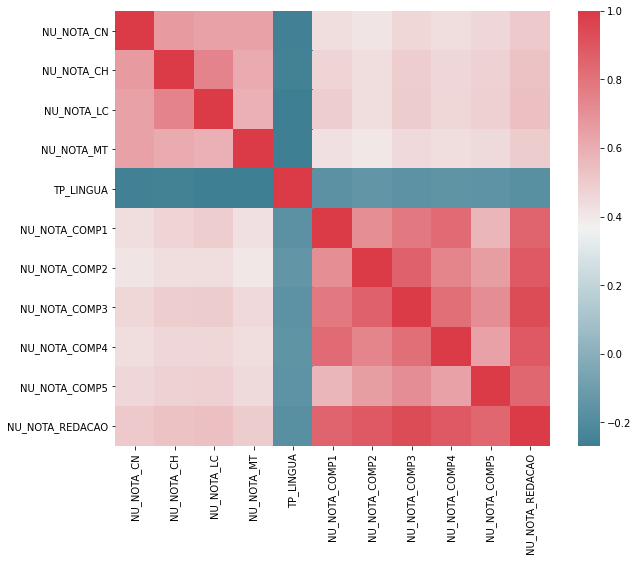

In [ ]:
#Correlação entre as notas.


ENEM = df.iloc[:,91:111].compute()
ENEM = ENEM.drop(["TP_STATUS_REDACAO"],axis=1)

f, ax = plt.subplots(figsize=(10, 8))
corr = ENEM.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Pelo gráfico acima, notamos que há uma grande correlação positiva entre as quatro grandes áreas de conhecimento, que variam entre 0,5 à 0,8, sendo Ciências Humanas e Linguagens e Códigos com a maior correlação. Além disso, percebemos que o tipo de lingua escolhida tem muito pouca influência na nota das outras áreas, ou seja, não importa se a pessoa escolher inglês ou espanhol, não mudará tanto a nota obtida nas outras áreas.

Por fim, temos que de fato, as pessoas que possuem maior facilidade em Linguens e Códigos e Ciências Humanas há uma pequena vantagem de obter uma nota maior na Redação do Enem, já que há uma correlação positiva um pouco maior do que Matemática e Ciências Naturais.

<AxesSubplot:>

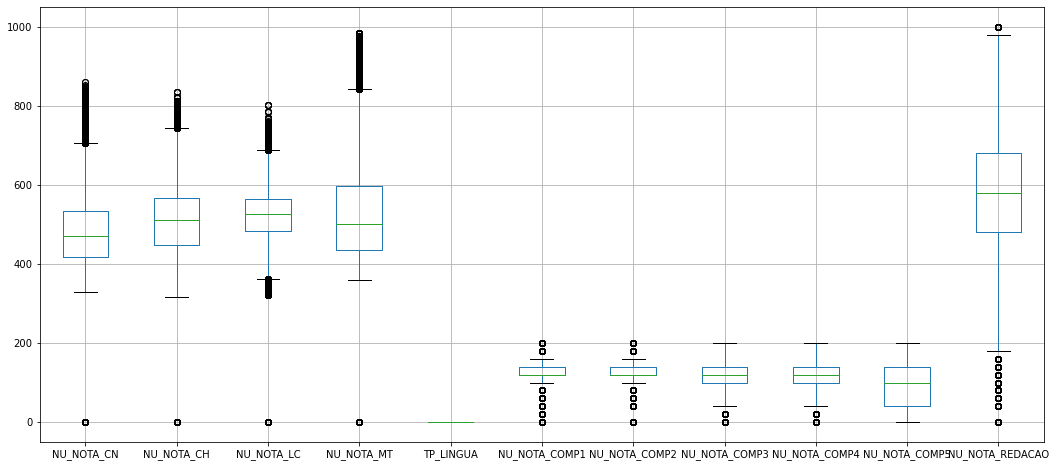

In [ ]:
ENEM.boxplot(fontsize=10,figsize=(19, 6))

O boxplot acima relaciona as notas obtidas em cada área do conhecimento, e a nota da redação, mostrando também a nota de cada competência. Ao observamos, notamos que o assunto em que grande parte das pessoas vão mal é Ciências Naturais, pois possui a menor mediana, seguida por Matemática, Ciências Humanas, Linguagens e Código e por fim a Redação.  Mesmo a matemática sendo uma das matérias em que grande parte parte das pessoas vão mal, em contrapartida, é a área do conhecimento que há a maior concentração de pessoas com as melhores notas, já que o 3º quartil acaba bem depois das outras áreas.

Também notamos que a nota da redação é o que apresenta maior dispersão. Essa alta dispersão pode ser principalmente obtida pela competência cinco, que é a que possui a menor mediana, e também tem os seus limites inferiores e superiores variando de 0 a 200, ou seja, o valor máximo e mínimo que pode ser obtido na nota de cada competência do Enem. Vale ressaltar, que dentre as outras competências, a 1 e a 2, foram as que os participantes obtiveram a menor variação entre as notas, tendo assim vários outliers, dados atípicos na distribuição, de pessoas que conseguiram notas muito alta ou baixas na competência.

<AxesSubplot:ylabel='Density'>

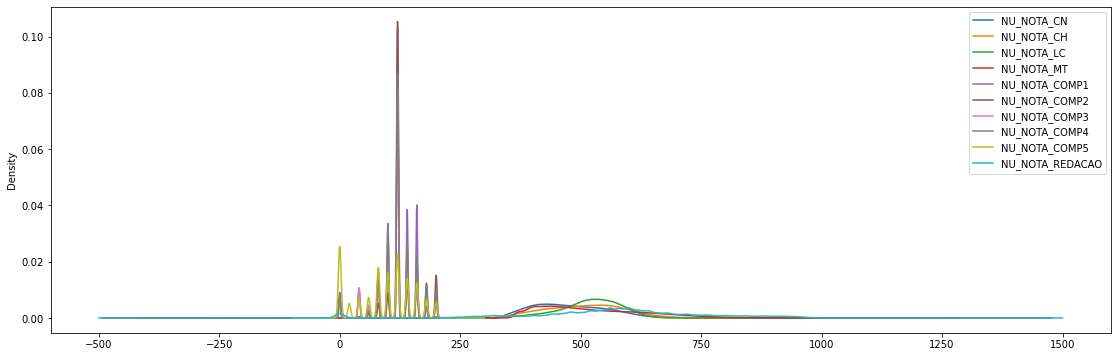

In [ ]:
ENEM.drop(["TP_LINGUA"],axis=1).plot.density(fontsize=10,figsize=(19, 6))
plt.title('Gráfico de densidade das áreas de conhecimento e Redação do ENEM pela nota ', size = 20)

#### Média das Notas por tipo de escola

* Os tipo de escola.
    - 1: Federal
    - 2: Estadual
    - 3: Municipal
    - 4: Privada


In [ ]:
school = [
    df.groupby('TP_DEPENDENCIA_ADM_ESC').NU_NOTA_CN.mean().compute(),
    df.groupby('TP_DEPENDENCIA_ADM_ESC').NU_NOTA_CH.mean().compute(),
    df.groupby('TP_DEPENDENCIA_ADM_ESC').NU_NOTA_LC.mean().compute(),
    df.groupby('TP_DEPENDENCIA_ADM_ESC').NU_NOTA_MT.mean().compute(),
    df.groupby('TP_DEPENDENCIA_ADM_ESC').NU_NOTA_REDACAO.mean().compute()]
    
print(school)

[TP_DEPENDENCIA_ADM_ESC
1.0    532.028308
2.0    455.013115
3.0    478.989470
4.0    544.780595
Name: NU_NOTA_CN, dtype: float64, TP_DEPENDENCIA_ADM_ESC
1.0    559.486424
2.0    485.943224
3.0    509.130196
4.0    571.588744
Name: NU_NOTA_CH, dtype: float64, TP_DEPENDENCIA_ADM_ESC
1.0    559.152574
2.0    503.874176
3.0    522.910669
4.0    567.969100
Name: NU_NOTA_LC, dtype: float64, TP_DEPENDENCIA_ADM_ESC
1.0    605.685105
2.0    497.209439
3.0    526.443656
4.0    627.826030
Name: NU_NOTA_MT, dtype: float64, TP_DEPENDENCIA_ADM_ESC
1.0    698.709528
2.0    535.227923
3.0    565.457398
4.0    729.439139
Name: NU_NOTA_REDACAO, dtype: float64]


As escolas particulares obteram melhores médias do que os alunos de escolas públicas.


#### Média das Notas por Estado

In [4]:
states = [
    df.groupby('SG_UF_RESIDENCIA').NU_NOTA_CN.mean().compute(),
    df.groupby('SG_UF_RESIDENCIA').NU_NOTA_CH.mean().compute(),
    df.groupby('SG_UF_RESIDENCIA').NU_NOTA_LC.mean().compute(),
    df.groupby('SG_UF_RESIDENCIA').NU_NOTA_MT.mean().compute(),
    df.groupby('SG_UF_RESIDENCIA').NU_NOTA_REDACAO.mean().compute()]

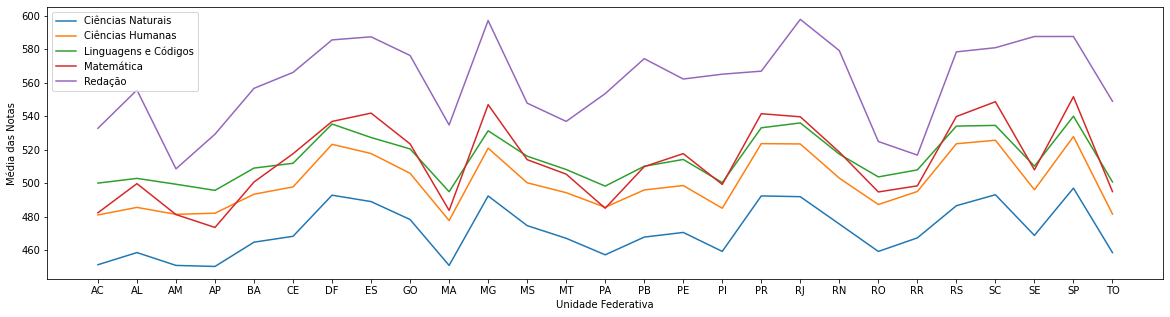

In [22]:
xlabel = dict(states[0]).keys()
title = ['Ciências Naturais','Ciências Humanas','Linguagens e Códigos','Matemática','Redação']

for i in range(5):
    y = list()
    for j in range(27):
        y.append(states[i][j])
    plt.plot(xlabel,y)

plt.xlabel("Unidade Federativa")
plt.ylabel("Média das Notas")
plt.legend(title)
plt.rcParams["figure.figsize"] = (30,5)
plt.show()

Analisando os dados por região, notamos que a região Sudeste detém as melhores médias em todas áreas do conhecimento e redação, sendo SP liderando nas áreas do conhecimento e RJ na redação, seguido pela região Sul com ótimos resultados do estado de SC. Já os estados que estão entre as piores médias, temos MA, AP, AM e AC, compostos da região nordeste e principalmente norte.

#### Examinando o Questionário Socioeconômico

A partir do questionario socioeconômico do ENEM foi analisado a média das notas para cada uma das respostas.

In [ ]:
# O processamento feito a seguir foi salvo no arquivo social-questionnaire.json pois demorou para calcular

'''
i = 1
questionnaire = []

while i <10:
    questionnaire.append([
    df.groupby('Q00'+str(i)).NU_NOTA_CN.mean().compute().tolist(),
    df.groupby('Q00'+str(i)).NU_NOTA_CH.mean().compute().tolist(),
    df.groupby('Q00'+str(i)).NU_NOTA_LC.mean().compute().tolist(),
    df.groupby('Q00'+str(i)).NU_NOTA_MT.mean().compute().tolist(),
    df.groupby('Q00'+str(i)).NU_NOTA_REDACAO.mean().compute().tolist()])
    i = i+1
    print("ok",i)

while i < 26:
    questionnaire.append([
    df.groupby('Q0'+str(i)).NU_NOTA_CN.mean().compute().tolist(),
    df.groupby('Q0'+str(i)).NU_NOTA_CH.mean().compute().tolist(),
    df.groupby('Q0'+str(i)).NU_NOTA_LC.mean().compute().tolist(),
    df.groupby('Q0'+str(i)).NU_NOTA_MT.mean().compute().tolist(),
    df.groupby('Q0'+str(i)).NU_NOTA_REDACAO.mean().compute().tolist()])
    i = i+1
    print("ok",i)

with open('social-questionnaire.json', 'w') as f:
    json.dump(questionnaire, f)

'''

# Lendo os dados que foram pré-processados

with open('social-questionnaire.json') as f:
   questionnaire = json.load(f)

print(questionnaire[0])

[[442.2739791190132, 454.3748427156051, 465.1795835372827, 471.8865770034298, 488.2020397860436, 528.8154217311948, 543.570116097516, 459.78136516703927], [469.7548846658781, 483.9687483165623, 495.4131887496624, 502.1112610691676, 518.7754981418016, 557.278762205226, 570.4682015807325, 489.62588435374147], [485.0112393987948, 500.5247181443891, 511.5388449707332, 518.0072642022582, 531.6112838437356, 559.2797922966262, 567.9815954739461, 507.18218598153544], [466.05376345238045, 486.4077780546843, 505.34442662374227, 515.6984986513664, 538.8768382225314, 600.1926782778664, 624.0266050365607, 495.39633289258586], [486.6628729452756, 524.3027494808495, 549.8694482713377, 566.1103979460847, 597.3121530934098, 667.4245842655957, 694.9726335081402, 526.8423833819242]]


In [ ]:
i = 1
questionnaire = []

while i <10:
    questionnaire.append(df.groupby('Q00'+str(i)).size().compute())
    i = i+1
    #print("ok",i)

while i < 26:
    questionnaire.append(df.groupby('Q0'+str(i)).size().compute())
    i = i+1
    #print("ok",i)

print(questionnaire)

ok 2
ok 3
ok 4
ok 5
ok 6
ok 7
ok 8
ok 9
ok 10
ok 11
ok 12
ok 13
ok 14
ok 15
ok 16
ok 17
ok 18
ok 19
ok 20
ok 21
ok 22
ok 23
ok 24
ok 25
ok 26
[Q001
A     290615
B    1135816
C     723518
D     586620
E    1308991
F     375721
G     229183
H     444806
dtype: int64, Q002
A     194625
B     854826
C     686198
D     667415
E    1633692
F     513711
G     399470
H     145333
dtype: int64, Q003
A    1092542
B    1079077
C    1203182
D     865524
E     279823
F     575122
dtype: int64, Q004
A     889104
B    2204272
C     349395
D    1023529
E     191505
F     437465
dtype: int64, Q005
1      142014
2      645557
3     1299838
4     1639448
5      830392
6      306841
7      128880
8       55546
9       20920
10      14192
11       4469
12       2916
13       1512
14        749
15        619
16        331
17        183
18        159
19        132
20        572
dtype: int64, Q006
A     232075
B    1273250
C    1311465
D     499616
E     475568
F     226251
G     301922
H     192912
I     143

In [ ]:
relativeQuestionnaire = []

for i in questionnaire:
    relativeQuestionnaire.append(i/i.sum())  

relativeQuestionnaire[0]
 

Q001
A    0.057036
B    0.222916
C    0.141998
D    0.115130
E    0.256903
F    0.073739
G    0.044980
H    0.087298
dtype: float64

In [ ]:
quests ='''Q001	Até que série seu pai, ou o homem responsável por você, estudou?
	
		
Q002	Até que série sua mãe, ou a mulher responsável por você, estudou?
	
	
	
	
	
	
Q003	A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).
	
	
		
Q004	A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).
	
	
	
	
	
Q005	Incluindo você, quantas pessoas moram atualmente em sua residência?
	
	
	
	
	

	
	
Q006	Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
	
	
	

	
	
	
	
Q007	Em sua residência trabalha empregado(a) doméstico(a)?
	
	
	
Q008	Na sua residência tem banheiro?
	
	
	
	
Q009	Na sua residência tem quartos para dormir?
	
	
	
	
Q010	Na sua residência tem carro?
	
	
	
	
Q011	Na sua residência tem motocicleta?
	
	
	
	
Q012	Na sua residência tem geladeira?
	
	
	
	
Q013	Na sua residência tem freezer (independente ou segunda porta da geladeira)?
	
	
	
	
Q014	Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)
	
	
	
	
Q015	Na sua residência tem máquina de secar roupa (independente ou em conjunto com a máquina de lavar roupa)?
	
	
	
	
Q016	Na sua residência tem forno micro-ondas?
	
	
	
	
Q017	Na sua residência tem máquina de lavar louça?
	
	
	
	
Q018	Na sua residência tem aspirador de pó?
	
Q019	Na sua residência tem televisão em cores?
	
	
	
	
Q020	Na sua residência tem aparelho de DVD?
	
Q021	Na sua residência tem TV por assinatura?
	
Q022	Na sua residência tem telefone celular?
	
	
	
	
Q023	Na sua residência tem telefone fixo?
	
Q024	Na sua residência tem computador?
	
	
	
	
Q025	Na sua residência tem acesso à Internet? '''

quests = re.split("\t+|\n+",quests)

i = 0
while i < len(quests):
    if quests[i] == '':
        quests.remove(quests[i])
    else:
        i = i+1


i = 0

dictQuest = {}

while i < len(quests):
    if i%2==0:
        key = quests[i]
    else:
        dictQuest[key] = quests[i]
    i += 1


dictQuest

{'Q001': 'Até que série seu pai, ou o homem responsável por você, estudou?',
 'Q002': 'Até que série sua mãe, ou a mulher responsável por você, estudou?',
 'Q003': 'A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).',
 'Q004': 'A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).',
 'Q005': 'Incluindo você, quantas pessoas moram atualmente em sua residência?',
 'Q006': 'Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)',
 'Q007': 'Em sua residência trabalha empregado(a) doméstico(a)?',
 'Q008': 'Na sua residên

In [ ]:

answers = '''A	Nunca estudou.
B	Não completou a 4ª série/5º ano do Ensino Fundamental.
C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
E	Completou o Ensino Médio, mas não completou a Faculdade.
F	Completou a Faculdade, mas não completou a Pós-graduação.
G	Completou a Pós-graduação.
H	Não sei.
A	Nunca estudou.
B	Não completou a 4ª série/5º ano do Ensino Fundamental.
C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
E	Completou o Ensino Médio, mas não completou a Faculdade.
F	Completou a Faculdade, mas não completou a Pós-graduação.
G	Completou a Pós-graduação.
H	Não sei.
A	Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.
B	Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.
C	Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.
D	Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.
E	Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.
F	Não sei.
A	Grupo 1: Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista.
B	Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.
C	Grupo 3: Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânica, operadora de máquinas, soldadora, operária de fábrica, trabalhadora da mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista.
D	Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria.
E	Grupo 5: Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitária, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados.
F	Não sei.
1	1, pois moro sozinho(a).
2	2
3	3
4	4
5	5
6	6
7	7
8	8
9	9
10	10
11	11
12	12
13	13
14	14
15	15
16	16
17	17
18	18
19	19
20	20
A	Nenhuma renda.
B	Até R$ 998,00.
C	De R$ 998,01 até R$ 1.497,00.
D	De R$ 1.497,01 até R$ 1.996,00.
E	De R$ 1.996,01 até R$ 2.495,00.
F	De R$ 2.495,01 até R$ 2.994,00.
G	De R$ 2.994,01 até R$ 3.992,00.
H	De R$ 3.992,01 até R$ 4.990,00.
I	De R$ 4.990,01 até R$ 5.988,00.
J	De R$ 5.988,01 até R$ 6.986,00.
K	De R$ 6.986,01 até R$ 7.984,00.
L	De R$ 7.984,01 até R$ 8.982,00.
M	De R$ 8.982,01 até R$ 9.980,00.
N	De R$ 9.980,01 até R$ 11.976,00.
O	De R$ 11.976,01 até R$ 14.970,00.
P	De R$ 14.970,01 até R$ 19.960,00.
Q	Mais de R$ 19.960,00.
A	Não.
B	Sim, um ou dois dias por semana.
C	Sim, três ou quatro dias por semana.
D	Sim, pelo menos cinco dias por semana.
A	Não.
B	Sim, um.
C	Sim, dois.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, um.
C	Sim, dois.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, um.
C	Sim, dois.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, uma.
C	Sim, duas.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, uma.
C	Sim, duas.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, um.
C	Sim, dois.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, uma.
C	Sim, duas.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, uma.
C	Sim, duas.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, um.
C	Sim, dois.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, uma.
C	Sim, duas.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim.
A	Não.
B	Sim, uma.
C	Sim, duas.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim.
A	Não.
B	Sim.
A	Não.
B	Sim, um.
C	Sim, dois.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim.
A	Não.
B	Sim, um.
C	Sim, dois.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim.'''

answers = re.split("\t+|\n+",answers)

answers

['A',
 'Nunca estudou.',
 'B',
 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
 'C',
 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
 'D',
 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
 'E',
 'Completou o Ensino Médio, mas não completou a Faculdade.',
 'F',
 'Completou a Faculdade, mas não completou a Pós-graduação.',
 'G',
 'Completou a Pós-graduação.',
 'H',
 'Não sei.',
 'A',
 'Nunca estudou.',
 'B',
 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
 'C',
 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
 'D',
 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
 'E',
 'Completou o Ensino Médio, mas não completou a Faculdade.',
 'F',
 'Completou a Faculdade, mas não completou a Pós-graduação.',
 'G',
 'Completou a Pós-graduação.',
 'H',
 'Não sei.',
 'A',
 'Grupo 1: Lavrador, agricultor sem empregados

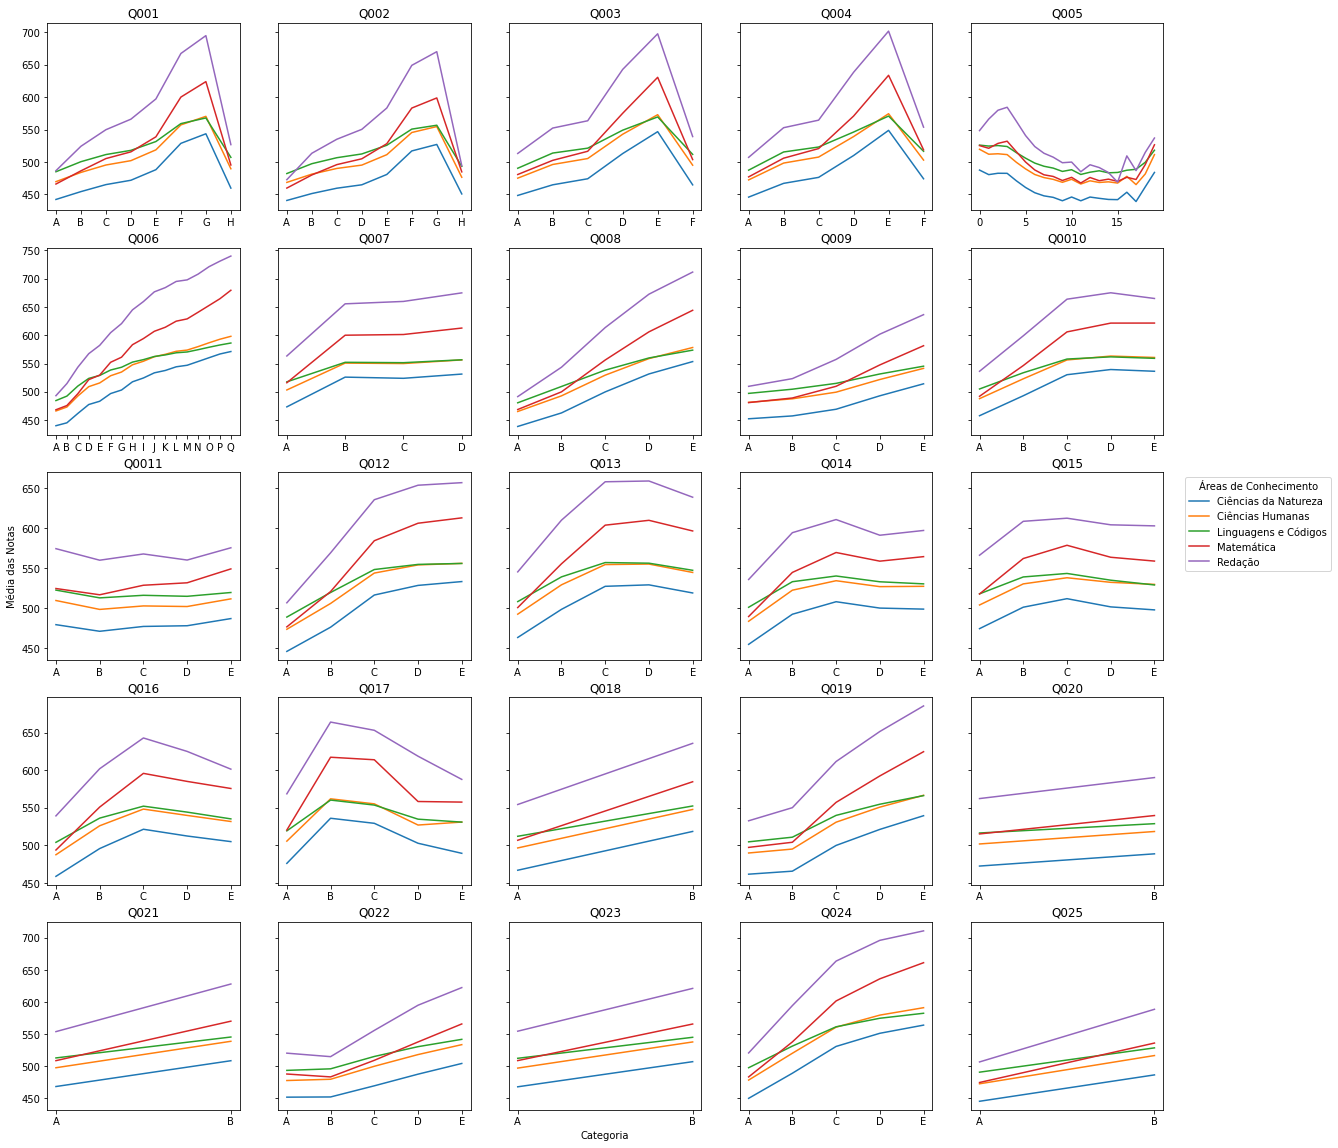

In [ ]:
dfjs = pd.read_json('social-questionnaire.json')

label = ['Ciências da Natureza','Ciências Humanas','Linguagens e Códigos','Matemática','Redação']
Alfabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q']

plot1 = np.arange(len(xlabel))

fig, x = plt.subplots(nrows=5, ncols=5, figsize=(20,20), sharey='row')

k=0
for i in range(5):
    for j in range(5):
        n = len(dfjs[0][k])

        if k == 4:
            xlabel = np.arange(len(dfjs[0][k]))
        else:
            xlabel = Alfabet[0:n]

        if k>10:
            title = 'Q0'+str(k+1)
        else:
            title = 'Q00'+str(k+1)

        x[i,j].plot(xlabel,dfjs[0][k])
        x[i,j].plot(xlabel,dfjs[1][k])
        x[i,j].plot(xlabel,dfjs[2][k])
        x[i,j].plot(xlabel,dfjs[3][k])
        x[i,j].plot(xlabel,dfjs[4][k])
        x[i,j].set_title(title)
        
        k+=1

x[2,0].legend(label, bbox_to_anchor=(6.7,1), title='Áreas de Conhecimento')

x[2,0].set_ylabel("Média das Notas")
x[4,2].set_xlabel("Categoria")

plt.show()

Os gráficos acima representam a média das notas de cada área do conhecimento em relação as respostas do questionário socioeconômico. No qual, quanto mais afastado da letra A melhor tende a ser a condição da familía financeiramente na maior parte dos gráficos ou em outros casos, como no Q001, o gráfico representa a escolaridade do pai. No caso do Q005, o valor é numérico, pois representa quantidade de pessoas na residência. Para mais detalhes sobre cada questão, o arquivo `Dicionário_Microdados_Enem_2019` contém as informações.

Analisando os gráficos, notamos que as respostas a média dos alunos tendem a crescer quanto melhor as condições socioeconômicas. Porém há também alguns casos que contradizem, como o Q016, que implica que ao ter um quantidade muito grande de forno micro-ondas, a média das notas tendem a cair.

#### Média das Notas pela Idade

In [7]:
years = [
    df.groupby('NU_IDADE').NU_NOTA_CN.mean().compute(),
    df.groupby('NU_IDADE').NU_NOTA_CH.mean().compute(),
    df.groupby('NU_IDADE').NU_NOTA_LC.mean().compute(),
    df.groupby('NU_IDADE').NU_NOTA_MT.mean().compute(),
    df.groupby('NU_IDADE').NU_NOTA_REDACAO.mean().compute()]

C:\Users\Vinic\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexes\base.py:3080: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(casted_key)


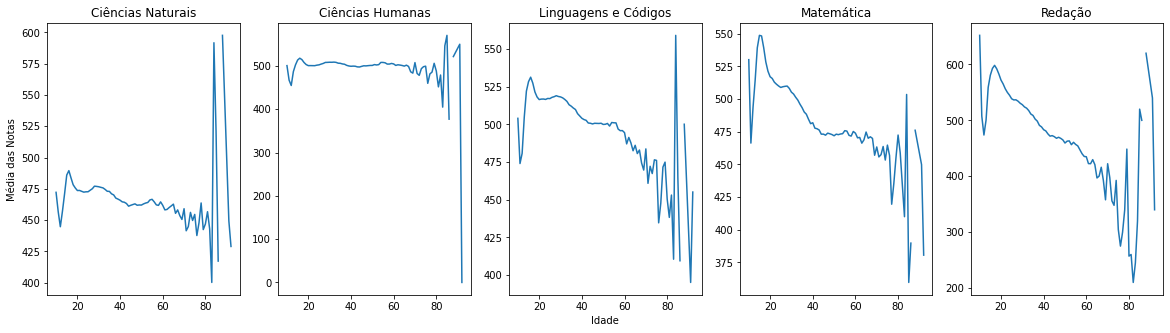

In [52]:
fig, x = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i in range(5):
    xlabel = sorted(dict(years[i]))
    y = list()
    for j in xlabel:
        y.append(years[i][j])
    x[i].plot(xlabel,y)
    x[i].set_title(title[i])


x[2].set_xlabel("Idade")
x[0].set_ylabel("Média das Notas")
plt.show()

Observando os gráficos, temos que de fato a idade que apresenta a melhor média são as pessoas que acabaram de sair da escola, ou seja, em torno de 18 anos. Porém, há alguns outliers, que possivelmente são causados pela quantidade de pessoas daquela idade que realizou a prova, que no caso há três casos principais que se destaca, no qual há duas pessoas acima de 80 anos e uma com provavelmente 10 anos.

#### Média das notas por etnia

In [3]:
etnia = [
    df.groupby('TP_COR_RACA').NU_NOTA_CN.mean().compute(),
    df.groupby('TP_COR_RACA').NU_NOTA_CH.mean().compute(),
    df.groupby('TP_COR_RACA').NU_NOTA_LC.mean().compute(),
    df.groupby('TP_COR_RACA').NU_NOTA_MT.mean().compute(),
    df.groupby('TP_COR_RACA').NU_NOTA_REDACAO.mean().compute()
]

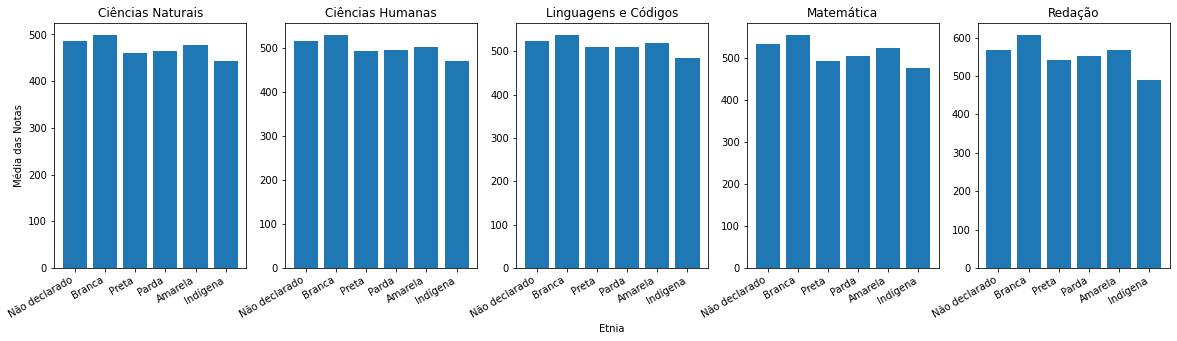

In [5]:
xlabel = ['Não declarado','Branca','Preta','Parda','Amarela','Indígena']
title = ['Ciências Naturais','Ciências Humanas','Linguagens e Códigos','Matemática','Redação']

fig, x = plt.subplots(nrows=1, ncols=5, figsize=(20,5))


for i in range(5):
    y = list()
    for j in range(6):
        y.append(etnia[i][j])
    x[i].bar(xlabel,y)
    x[i].set_title(title[i])


x[2].set_xlabel("Etnia")
x[0].set_ylabel("Média das Notas")
plt.gcf().autofmt_xdate()
plt.show()

Primeiramente vemos que o preconceito de que os asiáticos são mais inteligentes não se aplica nesse caso, pois só observando os gráficos vemos que quem declarou que era branco ou as pessoas que Não declaram, conseguiram obter um méia superior a quem declarou ser amarelo. Além disso, notamos que infelizmente a educação indígena ainda se sai atrás, possivelmente por ainda existir obstáculos significativos que impedem a garantia do direito à educação de qualidade para os jovens indígenas, bem como sua progressão nos estudos.

#### Média das Notas por sexo

In [4]:
sexo = [
    df.groupby('TP_SEXO').NU_NOTA_CN.mean().compute(),
    df.groupby('TP_SEXO').NU_NOTA_CH.mean().compute(),
    df.groupby('TP_SEXO').NU_NOTA_LC.mean().compute(),
    df.groupby('TP_SEXO').NU_NOTA_MT.mean().compute(),
    df.groupby('TP_SEXO').NU_NOTA_REDACAO.mean().compute()
]

[TP_SEXO
F    469.982003
M    489.316898
Name: NU_NOTA_CN, dtype: float64, TP_SEXO
F    501.894048
M    515.133324
Name: NU_NOTA_CH, dtype: float64, TP_SEXO
F    519.763160
M    521.628654
Name: NU_NOTA_LC, dtype: float64, TP_SEXO
F    506.167126
M    547.975110
Name: NU_NOTA_MT, dtype: float64, TP_SEXO
F    577.159368
M    562.396035
Name: NU_NOTA_REDACAO, dtype: float64]


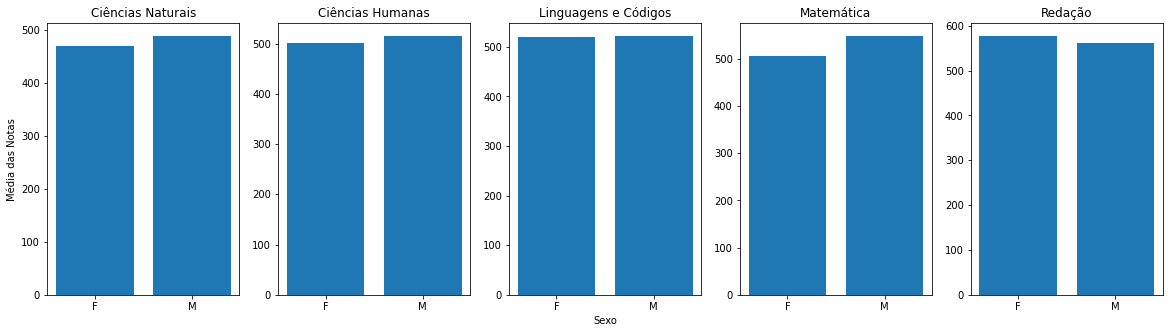

In [53]:
xlabel = ['F','M']
title = ['Ciências Naturais','Ciências Humanas','Linguagens e Códigos','Matemática','Redação']
y = list()

fig, x = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i in range(5):
    y = list()
    for j in range(2):
        y.append(sexo[i][j])
    x[i].bar(xlabel,y)
    x[i].set_title(title[i])


x[2].set_xlabel("Sexo")
x[0].set_ylabel("Média das Notas")
plt.show()

Ao ver as médias das notas do Enem de 2019, a diferença entre homens e mulheres é quase inexistente, com uma diferença maior na área de matemática, em que o sexo masculino se sobressai.

#### Média da notas pelo ano de conclusão

In [6]:
conclusion = [
    df.groupby('TP_ANO_CONCLUIU').NU_NOTA_CN.mean().compute(),
    df.groupby('TP_ANO_CONCLUIU').NU_NOTA_CH.mean().compute(),
    df.groupby('TP_ANO_CONCLUIU').NU_NOTA_LC.mean().compute(),
    df.groupby('TP_ANO_CONCLUIU').NU_NOTA_MT.mean().compute(),
    df.groupby('TP_ANO_CONCLUIU').NU_NOTA_REDACAO.mean().compute()
]

TP_ANO_CONCLUIU
0     476.278801
1     478.234603
2     478.552169
3     480.434024
4     479.530786
5     479.320432
6     478.914089
7     479.395495
8     480.820738
9     477.905774
10    479.956699
11    481.830718
12    479.320202
13    481.049908
Name: NU_NOTA_CN, dtype: float64


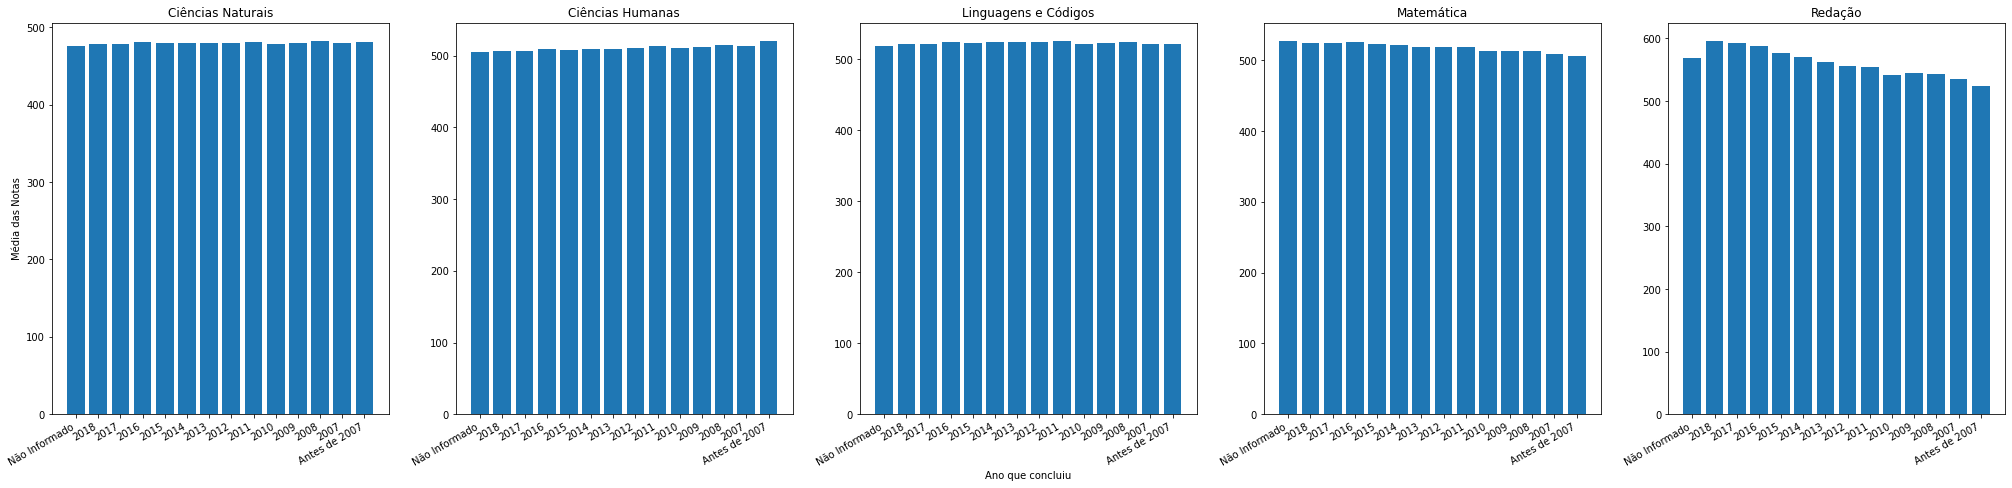

In [57]:
xlabel = ['Não Informado','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','Antes de 2007']
title = ['Ciências Naturais','Ciências Humanas','Linguagens e Códigos','Matemática','Redação']
y = list()

fig, x = plt.subplots(nrows=1, ncols=5, figsize=(35,8))

for i in range(5):
    y = list()
    for j in range(14):
        y.append(conclusion[i][j])
    x[i].bar(xlabel,y)
    x[i].set_title(title[i])


x[2].set_xlabel("Ano que concluiu")
x[0].set_ylabel("Média das Notas")
plt.gcf().autofmt_xdate()
plt.show()

Surpreendentemente em três áreas do conhecimente há quase nenhuma diferença entre quem acabou de sair da escola para quem já saiu a muito tempo, tirando na Matemática e na Redação.

In [3]:
# O processamento feito a seguir foi salvo no arquivo social-questionnaire.json pois demorou para calcular

'''
Qespecial = df.iloc[:,28:79].compute()

Qspecial = Qspecial.columns.tolist()
special = []
for i in Qspecial:
    special.append([
    df.groupby(i).NU_NOTA_CN.mean().compute().tolist(),
    df.groupby(i).NU_NOTA_CH.mean().compute().tolist(),
    df.groupby(i).NU_NOTA_LC.mean().compute().tolist(),
    df.groupby(i).NU_NOTA_MT.mean().compute().tolist(),
    df.groupby(i).NU_NOTA_REDACAO.mean().compute().tolist()])
    print("ok",i)

with open('special-service.json', 'w') as f:
    json.dump(special, f)
    
'''

with open('special-service.json') as f:
   specialService = json.load(f)


print(specialService[0])

[[477.84573324054963, 459.297090069284], [507.2693939688573, 489.527312390925], [520.5448488616103, 497.27373472949387], [523.1673308863785, 486.14106235565816], [571.2581815769058, 511.4921465968586]]


In [9]:
# Dicionário contendo a variação das médias das notas de um grupo de pessoas com e sem um tipo de deficiência
diffs = {}
especialCol = df.columns.tolist()[28:79]

n = 0

for i in specialService:
    for j in i:
        diffs[especialCol[n]] =(((j[0]-j[1])**2)**0.5)
    n = n+1     

print(diffs)

{'IN_BAIXA_VISAO': 59.76603498004721, 'IN_CEGUEIRA': 54.03334012797575, 'IN_SURDEZ': 240.33063388950546, 'IN_DEFICIENCIA_AUDITIVA': 87.14321108425486, 'IN_SURDO_CEGUEIRA': 141.18942758227263, 'IN_DEFICIENCIA_FISICA': 61.545737577355624, 'IN_DEFICIENCIA_MENTAL': 235.6721021518863, 'IN_DEFICIT_ATENCAO': 118.10151493609794, 'IN_DISLEXIA': 72.7101249361591, 'IN_DISCALCULIA': 47.61810129781861, 'IN_AUTISMO': 104.18901045711641, 'IN_VISAO_MONOCULAR': 5.839867848516747, 'IN_OUTRA_DEF': 29.944920111280112, 'IN_GESTANTE': 55.38703781294009, 'IN_LACTANTE': 52.69982487140169, 'IN_IDOSO': 176.0361570256036, 'IN_ESTUDA_CLASSE_HOSPITALAR': 59.938592368130685, 'IN_SEM_RECURSO': 55.40084649759456, 'IN_BRAILLE': 31.971684190320957, 'IN_AMPLIADA_24': 74.04688666086696, 'IN_AMPLIADA_18': 39.89337726961162, 'IN_LEDOR': 101.89254078342788, 'IN_ACESSO': 68.42326966555049, 'IN_TRANSCRICAO': 79.00365126740132, 'IN_LIBRAS': 244.6678157454067, 'IN_TEMPO_ADICIONAL': 75.60697277941767, 'IN_LEITURA_LABIAL': 19.670

In [3]:
i = 1
Qespecial = df.iloc[:,28:79].compute()
especial = []

for i in Qespecial:
    especial.append(df.groupby(i).size().compute())
    print("ok",i)


ok IN_BAIXA_VISAO
ok IN_CEGUEIRA
ok IN_SURDEZ
ok IN_DEFICIENCIA_AUDITIVA
ok IN_SURDO_CEGUEIRA
ok IN_DEFICIENCIA_FISICA
ok IN_DEFICIENCIA_MENTAL
ok IN_DEFICIT_ATENCAO
ok IN_DISLEXIA
ok IN_DISCALCULIA
ok IN_AUTISMO
ok IN_VISAO_MONOCULAR
ok IN_OUTRA_DEF
ok IN_GESTANTE
ok IN_LACTANTE
ok IN_IDOSO
ok IN_ESTUDA_CLASSE_HOSPITALAR
ok IN_SEM_RECURSO
ok IN_BRAILLE
ok IN_AMPLIADA_24
ok IN_AMPLIADA_18
ok IN_LEDOR
ok IN_ACESSO
ok IN_TRANSCRICAO
ok IN_LIBRAS
ok IN_TEMPO_ADICIONAL
ok IN_LEITURA_LABIAL
ok IN_MESA_CADEIRA_RODAS
ok IN_MESA_CADEIRA_SEPARADA
ok IN_APOIO_PERNA
ok IN_GUIA_INTERPRETE
ok IN_COMPUTADOR
ok IN_CADEIRA_ESPECIAL
ok IN_CADEIRA_CANHOTO
ok IN_CADEIRA_ACOLCHOADA
ok IN_PROVA_DEITADO
ok IN_MOBILIARIO_OBESO
ok IN_LAMINA_OVERLAY
ok IN_PROTETOR_AURICULAR
ok IN_MEDIDOR_GLICOSE
ok IN_MAQUINA_BRAILE
ok IN_SOROBAN
ok IN_MARCA_PASSO
ok IN_SONDA
ok IN_MEDICAMENTOS
ok IN_SALA_INDIVIDUAL
ok IN_SALA_ESPECIAL
ok IN_SALA_ACOMPANHANTE
ok IN_MOBILIARIO_ESPECIFICO
ok IN_MATERIAL_ESPECIFICO
ok IN_NOME_SOC

In [ ]:
print(especial[0:5])

In [ ]:
sum0 = 0
sum1 = 0
for i in especial:
    sum0 += i[0]
    sum1 += i[1]

print(sum1)
print(sum1/(sum1+sum0))

95680
0.00036820000340954435


In [9]:
relativeEspecial = []

for i in especial:
    relativeEspecial.append(i/i.sum())  

print(relativeEspecial[0:5])

[IN_BAIXA_VISAO
0    0.998783
1    0.001217
dtype: float64, IN_CEGUEIRA
0    0.99986
1    0.00014
dtype: float64, IN_SURDEZ
0    0.999681
1    0.000319
dtype: float64, IN_DEFICIENCIA_AUDITIVA
0    0.999568
1    0.000432
dtype: float64, IN_SURDO_CEGUEIRA
0    0.999991
1    0.000009
dtype: float64]


## III. Data Preparation

+ Select data:   
+ Clean data:   
+ Construct data/transform data/feature engineering:   
+ Integrate data:   
+ (Re) Format data:   

Neste dataframe é perceptível algumas informações desnecessárias, como por exemplo o ano que foi prestado o vestibular, literalmente todos as pessoas desta base de dados realizaram o ENEM no ano de 2019. 

<!-- Além disso, para o nosso modelo vamos remover as pessoas que precisaram de alguma assistência para realizar a prova, p -->

In [15]:
df = df.dropna(subset=["NU_NOTA_REDACAO", "NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT"])


df = df.drop(["NU_INSCRICAO",
    "NU_ANO",
    "NO_MUNICIPIO_RESIDENCIA",
    "SG_UF_RESIDENCIA",
    "TP_NACIONALIDADE",
    "CO_MUNICIPIO_NASCIMENTO",
    "NO_MUNICIPIO_NASCIMENTO",
    "CO_UF_NASCIMENTO",
    "SG_UF_NASCIMENTO",
    "TP_SIT_FUNC_ESC",
    "CO_MUNICIPIO_PROVA",
    "NO_MUNICIPIO_PROVA",
    "CO_UF_PROVA",
    "SG_UF_PROVA",
    "TP_PRESENCA_CN",
    "TP_PRESENCA_CH",
    "TP_PRESENCA_LC",
    "TP_PRESENCA_MT",
    "CO_PROVA_CN",
    "CO_PROVA_CH",
    "CO_PROVA_LC",
    "CO_PROVA_MT",
    ],
    axis=1)

print(df.head())

   CO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA  NU_IDADE TP_SEXO  \
3                  1721000                17      25.0       F   
4                  3118601                31      22.0       F   
5                  5107602                51      37.0       M   
6                  2924009                29      22.0       F   
9                  3550308                35      17.0       M   

   TP_ESTADO_CIVIL  TP_COR_RACA  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
3                1            1                1                4          1   
4                1            1                1                4          1   
5                2            2                1               13          1   
6                1            3                1                5          1   
9                1            1                2                0          2   

   TP_ENSINO  ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
3        NaN  ...     A     A     A    C    

## IV. Modeling

+ Select modeling techniques: 
+ Generate test design: 
+ Build model: 
+ Assess model:  

## V. Evaluation                    

+ Evaluate results: 
+ Review process: 
+ Determine next steps: 

## VI. Deployment

+ Plan deployment: 
+ Plan monitoring and maintenance: 
+ Produce final report: 
+ Review project: 